#**STUDENTS PREDICITON**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn import tree
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/Sneha8501/Data-Science/main/students%20prediciton%20check.csv')
dataframe= pd.read_csv('https://raw.githubusercontent.com/Sneha8501/Data-Science/main/students%20prediciton%20check.csv')
data.head()

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,failures,health,absences,G1,G2,G3,FinalGrade
0,GP,F,U,at_home,teacher,course,mother,yes,no,no,no,yes,no,18,2,2,0,3,6,5,6,6.0,Poor
1,GP,F,U,at_home,other,course,father,no,yes,no,no,yes,yes,17,1,2,0,3,4,5,5,6.0,Poor
2,GP,F,U,health,services,family,mother,no,yes,yes,yes,yes,yes,15,1,3,0,5,2,15,14,15.0,Good
3,GP,F,U,other,other,family,father,no,yes,yes,no,yes,no,16,1,2,0,5,4,6,10,10.0,Poor
4,GP,M,U,services,other,recog,mother,no,yes,yes,yes,yes,yes,16,1,2,0,5,10,15,15,15.0,Good


In [ ]:
obj_df = data.select_dtypes(include=['object']).copy()
label_encoder = preprocessing.LabelEncoder()
for i in obj_df:
  data[i]= label_encoder.fit_transform(obj_df[i])

In [ ]:
data1=pd.DataFrame()
for i in data:
  data1[i] = data[i]

In [ ]:
data.head()

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,failures,health,absences,G1,G2,G3,FinalGrade
0,0,0,1,0,4,0,1,1,0,0,0,1,0,18,2,2,0,3,6,5,6,6.0,3
1,0,0,1,0,2,0,0,0,1,0,0,1,1,17,1,2,0,3,4,5,5,6.0,3
2,0,0,1,1,3,1,1,0,1,1,1,1,1,15,1,3,0,5,2,15,14,15.0,2
3,0,0,1,2,2,1,0,0,1,1,0,1,0,16,1,2,0,5,4,6,10,10.0,3
4,0,1,1,3,2,3,1,0,1,1,1,1,1,16,1,2,0,5,10,15,15,15.0,2


In [ ]:
data.shape

(651, 23)

In [ ]:
data.isnull().sum()

school         0
sex            0
address        0
Mothers job    0
Fathers job    0
reason         0
guardian       0
schoolsup      0
famsup         0
paid           0
activities     0
higher         0
internet       0
age            0
traveltime     0
studytime      0
failures       0
health         0
absences       0
G1             0
G2             0
G3             0
FinalGrade     0
dtype: int64

#**HYPOTHESIS TESTING**

In [ ]:
import scipy.stats as st

In [ ]:
print("Population mean")
print(dataframe.mean())
print("\nPopulation sd")
print(dataframe.std())

Population mean
age           16.758833
traveltime     1.460829
studytime      1.878648
failures       0.000000
health         3.480799
absences       4.296467
G1            11.680492
G2            11.929339
G3            12.284178
dtype: float64

Population sd
age           1.054760
traveltime    0.624809
studytime     0.683220
failures      0.000000
health        1.433935
absences      4.687755
G1            2.802620
G2            2.850843
G3            2.907531
dtype: float64


In [ ]:
s_ztest = dataframe.sample(n=60, random_state=1)
print("Sample  mean",s_ztest['G3'].mean())


Sample  mean 13.141666666666667


1.	The average final scores of students are more than 12.28. A sample of 60 students has a mean final score of 13.142.The standard deviation of the population is 2.908. Is there enough evidence to support the claim at alpha = 0.05?

In [ ]:
#H0 : μ = 12.28, Ha :  μ > 12.28
n = 60
xbar = 13.142
mu = 12.28
sigma = 2.908
alpha = 0.05

z_critical = abs(st.norm.ppf(alpha)) #Absolute value taken as the it's a right-tailed test and the original value will be negative
print("Z critical : ",z_critical)

z = (xbar- mu)/(sigma/np.sqrt(n))
print("Z : ",z)

if (z > z_critical): #Right-tailed test
    print("Reject null hypothesis")
else:
    print("Null hypothesis cannot be rejected")
    

Z critical :  1.6448536269514729
Z :  2.296087788466846
Reject null hypothesis


Inference: The null hypothesis is rejected.Hence there is evidence to support the claim that on an average the the final scores of the students in a class is greater than 12.28 

2.	Students who have an internet access has an average final score greater than 12.489.A sample of 25 students has a mean final score of 12.60 and standard deviation of 2.345. Is there enough evidence to support the claim at alpha = 0.01?

In [ ]:
g=dataframe.groupby(['internet'])
df=g.get_group("yes")
print("population mean",df['G3'].mean())
s_ttest= df.sample(n=25,random_state=1)
print("sample mean",s_ttest['G3'].mean())
print("sample sd",s_ttest['G3'].std())

population mean 12.489443378119002
sample mean 12.6
sample sd 2.345207879911715


In [ ]:
#H0 : μ = 12.489, Ha : μ > 12.489
n = 25
degrees_of_freedom = n-1
xbar = 12.60
mu = 12.489
s = 2.345
alpha = 0.01

t = (xbar - mu)/(s/np.sqrt(n))
print('t :',t)

p_val = (1 -st.t.cdf(abs(t),degrees_of_freedom) ) #"1 - cdf" because it's a right-tailed test
print('p_val :',p_val)

if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

t : 0.2366737739872044
p_val : 0.4074591407407582
Null hypothesis cannot be rejected


INFERENCE: The null hypothesis is accepted. Hence there is no evidence to support the claim that students who have internet access have an average final score greater than 12.48. 

3. Is there enough evidence to establish that there is no relationship between final grades and the attribute higher studies?

In [ ]:
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
FinalGrade_crosstab = pd.crosstab(data['higher'], data['FinalGrade'],margins=True)
FinalGrade_crosstab

FinalGrade,0,1,2,3,4,All
higher,,,,,,
0,0,0,0,23,14,37
1,26,7,135,159,287,614
All,26,7,135,182,301,651


In [ ]:
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P - Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    print (alpha)
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
	      print('Independent (fail to reject H0)')
    return expected
    print(alpha)

#null hypothesis = there is no relationship between final grades and higher studies
#alternate hypothesis = there is a relationship between final grades and higher studies
exp_table_1 = check_categorical_dependency(FinalGrade_crosstab, 0.95)

Chi-Square Statistic value = 27.139784935652678
P - Value = 0.002474940145583367
0.050000000000000044
Dependent (reject H0)


INFERENCE: The null hpothesis is rejected. Hence it is proved that the attributes higher studies and final grades have a relationship between them.

4.	Students who are present everyday has an average final score of 12.795. A sample of 15 students has an average final score of 12.77 and a standard deviation of 3.04. Is there enough evidence to support the claim at alpha = 0.05?

In [ ]:
g2=dataframe.groupby(['absences'])
df2=g2.get_group(0)
print("Population mean",df2['G3'].mean())
s_ttest2= df2.sample(n=15,random_state=1)
print("sample mean",s_ttest2['G3'].mean())
print("sample sd",s_ttest2['G3'].std())


Population mean 12.794811320754716
sample mean 12.766666666666667
sample sd 3.0405983120494713


In [ ]:
#H0 : μ = 12.794811 , Ha : μ != 11.93
n = 15
degrees_of_freedom = n-1
xbar = 12.77
mu = 12.795
s = 3.04
alpha = 0.05

t = (xbar-mu)/(s/np.sqrt(n))
print('t value =' ,t)

t_critical = st.t.ppf(alpha/2, degrees_of_freedom)
print('t_critical value is:',t_critical)

if (abs(t) > abs(t_critical)): #Absolute value taken as the it's a two-tailed test and the original t_critical value might be negative
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

t value = -0.031850191991837765
t_critical value is: -2.1447866879169277
Reject null hypothesis


INFERENCE: The null hypothesis is rejected. Hence there is a evidence to prove that students who are present everday has an average final score which is different from 12.795

5. Is there any enough evidence to claim to establish relationship between final grade and feature address.

In [ ]:
FinalGrade_crosstab2 = pd.crosstab(data1['address'], data1['FinalGrade'],margins=True)
FinalGrade_crosstab2

FinalGrade,0,1,2,3,4,All
address,,,,,,
0,6,3,28,62,80,179
1,20,4,107,120,221,472
All,26,7,135,182,301,651


In [ ]:
#null hypothesis = there is no relationship between final grades and address
#alternate hypothesis = there is a relationship between final grades and address
exp_table_3 = check_categorical_dependency(FinalGrade_crosstab2, 0.95)

Chi-Square Statistic value = 8.241209478037602
P - Value = 0.6052888326173858
0.050000000000000044
Independent (fail to reject H0)


INFERENCE:The null hypothesis is accepted.Hence there is no relation between 
address and finalgrade, eventhough student is from urban or rural it doesn't effect his final grade

6.	The average first midterm scores of students are less than 11.68. A sample of 70 students has a mean final score of 12.071. The standard deviation of the population is 2.80. Is there enough evidence to support the claim at alpha = 0.01?



In [ ]:
s_ztest1= dataframe.sample(n=70, random_state=1)
print("Sample ztest mean",s_ztest1['G1'].mean())


Sample ztest mean 12.071428571428571


In [ ]:
#H0 : μ = 11.68, Ha :  μ < 11.68
n = 70
xbar = 12.071
mu = 11.68
sigma = 2.80
alpha = 0.01

z_critical = st.norm.ppf(alpha) #Absolute value is not taken as the it's a left-tailed test and the original value will be negative
print('z_critical value=',z_critical)

z = (xbar- mu)/(sigma/np.sqrt(n))
print('z value =',z)

if (z < z_critical): #left-tailed test
    print("Reject null hypothesis")
else:
    print("Null hypothesis cannot be rejected")

z_critical value= -2.3263478740408408
z value = 1.16833596562437
Null hypothesis cannot be rejected


INFERENCE: The null hypothesis is accepted.Hence there is no evidence to prove that the average first midterm scores of the students are lesser than 11.68. 

7.	Students who participate in extracurricular activities has an average final score less than 12.429. A sample of 20 students has an average final score of 12.70 and standard deviation of 3.526. Is there enough evidence to support the claim at alpha = 0.01?

In [ ]:
g1=dataframe.groupby(['activities'])
df1=g1.get_group("yes")
print("Population mean",df1['G3'].mean())
s_ttest1= df1.sample(n=20,random_state=1)
print("sample mean",s_ttest1['G3'].mean())
print("sample sd",s_ttest1['G3'].std())


Population mean 12.429245283018869
sample mean 12.7
sample sd 3.5258444303979752


In [ ]:
#H0 : μ = 12.429, Ha : μ < 12.429
n = 20
degrees_of_freedom = n-1
xbar = 12.70
mu = 12.429
s = 3.526
alpha = 0.01

t = (xbar-mu)/(s/np.sqrt(n))
print('t :',t)

t_critical = st.t.ppf(alpha, degrees_of_freedom)
print('t_critical value :',t_critical)

if (t > t_critical): 
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

t : 0.3437177662520935
t_critical value : -2.5394831906222888
Null hypothesis cannot be rejected


INFERENCE: The null hypothesis is accepted.Hence there is no evidence to prove that the students who participate in extracurricular activities has an average final score less than 12.429.

8. Is there any enough evidence to prove the relation between school (GP,MS) and final grade



In [ ]:
FinalGrade_crosstab1 = pd.crosstab(data1['school'], data['FinalGrade'],margins=True)
FinalGrade_crosstab1

FinalGrade,0,1,2,3,4,All
school,,,,,,
0,18,3,108,112,219,460
1,8,4,27,70,82,191
All,26,7,135,182,301,651


In [ ]:
#null hypothesis = there is no relationship between final grades and school in which the students study in
#alternate hypothesis = there is a relationship between final grades and address in which the students study in
exp_table_2 = check_categorical_dependency(FinalGrade_crosstab1, 0.90)

Chi-Square Statistic value = 16.25936048853131
P - Value = 0.09244472188829311
0.09999999999999998
Dependent (reject H0)


INFERENCE:The null hypothesis is rejected.Hence proved that there is relationship between final grade and school. Students final grade was depended on the school he or she studied. GP school students finalgrade was high than MS school students.

9. Is there any enough evidence to claim that there is a relationship between whether a student has paid the fees or not and final grade

In [ ]:
a=dataframe.groupby(['paid'])
x=a.get_group('no')
x1=a.get_group('yes')

In [ ]:
FinalGrade_crosstab5 = pd.crosstab(x['school'], x['FinalGrade'],margins=True)
FinalGrade_crosstab5

FinalGrade,Excellent,Failure,Good,Poor,Satisfactory,All
school,,,,,,
GP,13,2,87,63,166,331
MS,8,3,24,59,72,166
All,21,5,111,122,238,497


In [ ]:
#null hypothesis = there is no relationship between final grades and students who did not pay
#alternate hypothesis = there is a relationship between final grades students who did not pay
exp_table_6 = check_categorical_dependency(FinalGrade_crosstab5, 0.90)

Chi-Square Statistic value = 22.0568334102991
P - Value = 0.014817673819553992
0.09999999999999998
Dependent (reject H0)


INFERENCE:The null hypothesi is rejected.Hence it is proved that there is a relationship between the atrribute final gade and the attribute paid with No values

In [ ]:
FinalGrade_crosstab6 = pd.crosstab(x1['paid'], x1['FinalGrade'],margins=True)
FinalGrade_crosstab6

FinalGrade,Excellent,Failure,Good,Poor,Satisfactory,All
paid,,,,,,
yes,5,2,24,60,63,154
All,5,2,24,60,63,154


In [ ]:
#null hypothesis = there is no relationship between final grades and students who payed
#alternate hypothesis = there is a relationship between final grades students who payed
exp_table_7 = check_categorical_dependency(FinalGrade_crosstab6, 0.90)

Chi-Square Statistic value = 0.0
P - Value = 1.0
0.09999999999999998
Independent (fail to reject H0)


INFERENCE:The null hypothesi is accepted.Hence it is proved that there is a no relationship between the atrribute final gade and the attribute paid with Yes values

There is a no relationship between fee paid and final grade if it was paid . If fee was not paid it was dependent because if it was not paid the marks allocated was less

# **SMOTE OVERSAMPLING**

In [ ]:
#Final grades
y =  data["FinalGrade"]
data = data.drop(["FinalGrade"], axis=1)

Counter({4: 301, 3: 182, 2: 135, 0: 26, 1: 7})
Class=3, n=182 (27.957%)
Class=2, n=135 (20.737%)
Class=4, n=301 (46.237%)
Class=0, n=26 (3.994%)
Class=1, n=7 (1.075%)


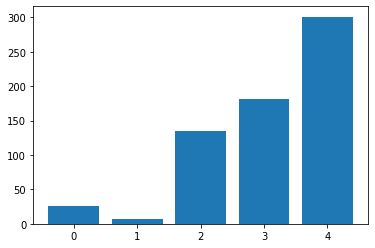

In [ ]:
from collections import Counter
import matplotlib
import matplotlib.pyplot as pyplot
counter = Counter(y)
print(counter)

for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=3, n=200 (22.198%)
Class=2, n=200 (22.198%)
Class=4, n=301 (33.407%)
Class=0, n=100 (11.099%)
Class=1, n=100 (11.099%)


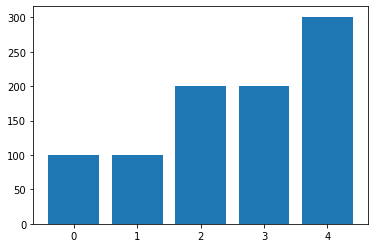

In [ ]:
from imblearn.over_sampling import SMOTE
strategy = {0:100, 1:100, 2:200, 3:200, 4:301}
oversample = SMOTE(sampling_strategy = strategy, k_neighbors = 3)
X, y = oversample.fit_resample(data, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#**SPLITING INTO TRAIN AND TEST**

In [ ]:
#spliting data to train and test by 70% and 30% respectievely 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

#**FEATURE SELECTION**

##**Removing Duplicate Features**

In [ ]:
train_features_T = X_train.T
train_features_T.shape

(22, 630)

In [ ]:
print(train_features_T.duplicated().sum())

0


In [ ]:
unique_features = train_features_T.drop_duplicates(keep='first').T
unique_features.shape

(630, 22)

In [ ]:
duplicated_features = [dup_col for dup_col in X_train.columns if dup_col not in unique_features.columns]
duplicated_features

[]

##**Variance threshold**

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [ ]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True])

In [ ]:
X_train.columns[var_thres.get_support()]

Index(['school', 'sex', 'address', 'Mothers job', 'Fathers job', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'age', 'traveltime', 'studytime', 'health', 'absences',
       'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
constant_columns=[column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]
constant_columns

['failures']

In [ ]:
len(constant_columns)

1

In [ ]:
X_train.drop(constant_columns,axis=1,inplace=True)
X_test.drop(constant_columns,axis=1,inplace=True)

##**Feature selection using Correlation**

In [ ]:
X_train.corr()

,school,sex,address,Mothers job,Fathers job,reason,guardian,schoolsup,famsup,paid,activities,higher,internet,age,traveltime,studytime,health,absences,G1,G2,G3
school,1.000000,-0.104608,-0.312340,-0.125054,-0.055587,-0.062361,-0.115345,-0.061544,-0.067121,-0.138547,-0.099545,-0.098172,-0.250962,0.044088,0.339562,-0.135181,-0.034682,-0.197430,-0.093336,-0.093119,-0.091452
sex,-0.104608,1.000000,0.131396,0.213428,0.172885,0.076759,0.060913,-0.052885,-0.059590,0.074282,0.171317,-0.023056,0.171180,-0.005571,0.037561,-0.144305,0.124024,0.066825,0.078310,0.072472,0.044773
address,-0.312340,0.131396,1.000000,0.155383,0.066410,0.088230,0.063057,0.043657,0.192184,0.099690,0.110535,0.004444,0.295437,0.060677,-0.192712,0.139957,0.045748,0.054459,0.104820,0.126428,0.107490
Mothers job,-0.125054,0.213428,0.155383,1.000000,0.311452,0.055399,0.104468,0.042579,-0.029317,0.102607,0.209178,0.111956,0.240019,0.025286,-0.081065,0.040074,0.192725,0.028626,0.178562,0.155956,0.152806
Fathers job,-0.055587,0.172885,0.066410,0.311452,1.000000,0.008228,-0.079905,0.050511,-0.060774,-0.030894,0.096733,0.062420,0.138668,-0.008723,0.039257,-0.042300,0.095697,-0.022745,0.067473,0.047866,0.041040
reason,-0.062361,0.076759,0.088230,0.055399,0.008228,1.000000,0.125080,0.054994,0.105307,0.113341,0.154984,0.063441,0.161521,0.165270,0.081293,0.188886,-0.156117,0.009960,0.115170,0.112307,0.102032
guardian,-0.115345,0.060913,0.063057,0.104468,-0.079905,0.125080,1.000000,0.045214,0.059766,0.134919,0.142007,-0.029329,0.124790,0.219031,0.044883,0.063860,-0.056106,0.229579,-0.127382,-0.139614,-0.152250
schoolsup,-0.061544,-0.052885,0.043657,0.042579,0.050511,0.054994,0.045214,1.000000,0.042583,0.138822,0.006559,0.062756,-0.085390,-0.065473,-0.056371,0.033458,0.034201,0.015176,-0.159312,-0.166621,-0.178486
famsup,-0.067121,-0.059590,0.192184,-0.029317,-0.060774,0.105307,0.059766,0.042583,1.000000,0.233384,0.075715,0.004970,0.112899,-0.017557,0.006520,0.198948,-0.003484,0.000630,-0.043348,-0.002100,-0.038518
paid,-0.138547,0.074282,0.099690,0.102607,-0.030894,0.113341,0.134919,0.138822,0.233384,1.000000,0.111133,0.072529,0.070175,0.001691,-0.015074,0.073110,0.015887,0.098267,-0.085576,-0.104526,-0.146119


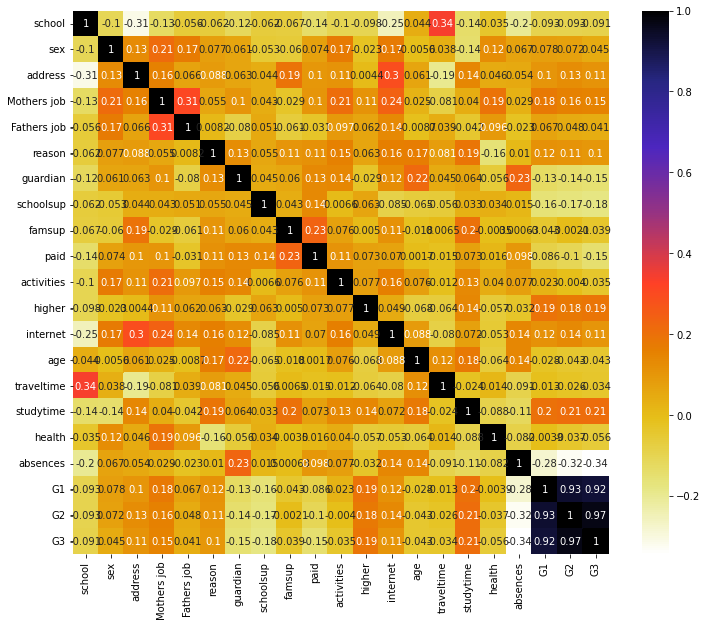

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[j]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

2

In [ ]:
corr_features

{'G1', 'G2'}

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

## **Feature selection using Information gain - mutual information**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.04022616, 0.03756282, 0.0394961 , 0.03129244, 0.05733395,
       0.        , 0.05908399, 0.03076912, 0.03651605, 0.02471749,
       0.02033   , 0.00142143, 0.01523814, 0.06601106, 0.05656347,
       0.09703315, 0.02855125, 0.07201989, 1.36478173])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

G3             1.364782
studytime      0.097033
absences       0.072020
age            0.066011
guardian       0.059084
Fathers job    0.057334
traveltime     0.056563
school         0.040226
address        0.039496
sex            0.037563
famsup         0.036516
Mothers job    0.031292
schoolsup      0.030769
health         0.028551
paid           0.024717
activities     0.020330
internet       0.015238
higher         0.001421
reason         0.000000
dtype: float64

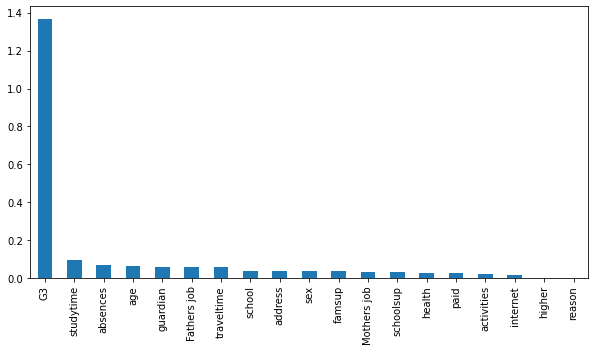

In [ ]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (10, 5))

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_feat = SelectKBest(mutual_info_classif, k = 12)
sel_feat.fit(X_train, y_train)
X_train.columns[sel_feat.get_support()]

Index(['sex', 'Mothers job', 'Fathers job', 'reason', 'higher', 'internet',
       'age', 'traveltime', 'studytime', 'health', 'absences', 'G3'],
      dtype='object')

In [ ]:
dd = pd.DataFrame(mutual_info).T
count=0
for i in dd.columns:
  if (dd[i][0] == 0.000):
    X_train.drop( i, axis=1, inplace = True)
    X_test.drop( i, axis=1, inplace = True)
X_train.shape

(630, 18)

**FScore- Chisquare Test**

In [ ]:
from sklearn.feature_selection import chi2
f_p_values = chi2(X_train, y_train)
f_p_values

(array([ 14.56555887,  28.16061492,  25.52228949,  21.74560898,
          2.09638294,   4.3081053 ,  19.46894519,  17.36313574,
         26.49015247,  30.59768229,   2.44255814,  10.1701314 ,
          2.61561407,   7.80070746,  15.2516756 ,  13.57776864,
        158.15151225, 478.21085077]),
 array([5.69252800e-003, 1.15720516e-005, 3.94966097e-005, 2.25192708e-004,
        7.18036930e-001, 3.65911248e-001, 6.35554766e-004, 1.64281506e-003,
        2.52000416e-005, 3.69789383e-006, 6.54950327e-001, 3.76573104e-002,
        6.24059665e-001, 9.91574449e-002, 4.20670456e-003, 8.77203299e-003,
        3.64197122e-033, 3.45330657e-102]))

In [ ]:
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values

school          5.692528e-03
sex             1.157205e-05
address         3.949661e-05
Mothers job     2.251927e-04
Fathers job     7.180369e-01
guardian        3.659112e-01
schoolsup       6.355548e-04
famsup          1.642815e-03
paid            2.520004e-05
activities      3.697894e-06
higher          6.549503e-01
internet        3.765731e-02
age             6.240597e-01
traveltime      9.915744e-02
studytime       4.206705e-03
health          8.772033e-03
absences        3.641971e-33
G3             3.453307e-102
dtype: float64

In [ ]:
p_values.sort_index(ascending = False)

traveltime      9.915744e-02
studytime       4.206705e-03
sex             1.157205e-05
schoolsup       6.355548e-04
school          5.692528e-03
paid            2.520004e-05
internet        3.765731e-02
higher          6.549503e-01
health          8.772033e-03
guardian        3.659112e-01
famsup          1.642815e-03
age             6.240597e-01
address         3.949661e-05
activities      3.697894e-06
absences        3.641971e-33
Mothers job     2.251927e-04
G3             3.453307e-102
Fathers job     7.180369e-01
dtype: float64

**OBSERVATION:** traveltime is the most important attribute when compared to the output feature Final Grade obtained

**Feature Importance of Logistic Regression**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Feature: 0, Score: -0.21723
Feature: 1, Score: 0.45479
Feature: 2, Score: -0.02097
Feature: 3, Score: -0.10270
Feature: 4, Score: -0.71956
Feature: 5, Score: 0.13299
Feature: 6, Score: 0.16187
Feature: 7, Score: -0.03766
Feature: 8, Score: -0.10736
Feature: 9, Score: -0.25390
Feature: 10, Score: -0.26312
Feature: 11, Score: -0.27414
Feature: 12, Score: 0.02198
Feature: 13, Score: -2.40193
Feature: 14, Score: -0.26299
Feature: 15, Score: -0.07981
Feature: 16, Score: 0.00000
Feature: 17, Score: -0.50644
Feature: 18, Score: -0.06592
Feature: 19, Score: 0.29001
Feature: 20, Score: 0.79338
Feature: 21, Score: 1.89737


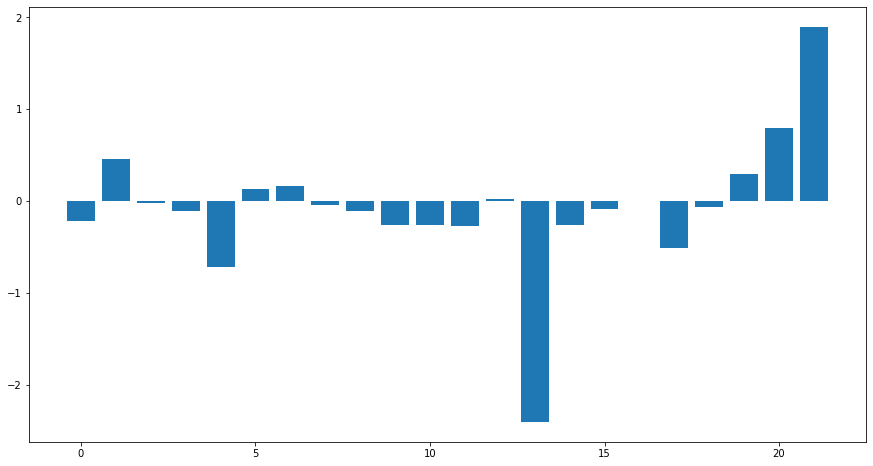

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(15,8)) 
plt.bar([x1 for x1 in range(len(importance))], importance)
plt.show()

**Feature Importance of Decision Tree**

Feature: 0, Score: 0.00193
Feature: 1, Score: 0.00885
Feature: 2, Score: 0.04896
Feature: 3, Score: 0.00039
Feature: 4, Score: 0.00967
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.02047
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00525
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00673
Feature: 13, Score: 0.00563
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.01050
Feature: 18, Score: 0.02845
Feature: 19, Score: 0.00814
Feature: 20, Score: 0.01601
Feature: 21, Score: 0.82903


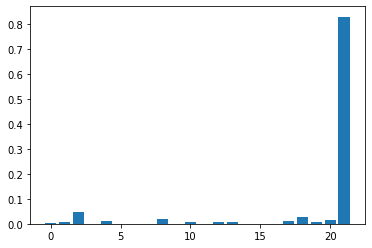

<Figure size 1080x864 with 0 Axes>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x1 for x1 in range(len(importance))], importance)
plt.figure(figsize=(15,12)) 
plt.show()

**Feature Importance of Random Forest**

Feature: 0, Score: 0.00842
Feature: 1, Score: 0.01520
Feature: 2, Score: 0.02095
Feature: 3, Score: 0.01700
Feature: 4, Score: 0.01627
Feature: 5, Score: 0.01727
Feature: 6, Score: 0.01281
Feature: 7, Score: 0.00337
Feature: 8, Score: 0.01805
Feature: 9, Score: 0.00751
Feature: 10, Score: 0.01314
Feature: 11, Score: 0.00717
Feature: 12, Score: 0.01490
Feature: 13, Score: 0.03005
Feature: 14, Score: 0.01432
Feature: 15, Score: 0.01736
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.02079
Feature: 18, Score: 0.03758
Feature: 19, Score: 0.12338
Feature: 20, Score: 0.20350
Feature: 21, Score: 0.38097


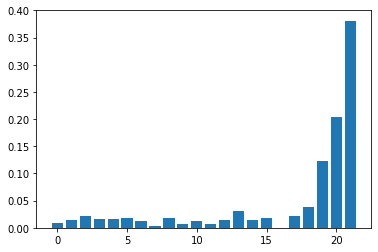

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x1 for x1 in range(len(importance))], importance)
plt.figure(figsize=(15,15)) 
plt.show()

#**MODELS**

**Accuracy score,Precision,Recall and F1score are  statistical measure of how well the data is fit to the classification lines**

**Accuracy_score**
*   The proportion of the total number of predictions that were correct
*   1 indicates a good accuracy and 0 indicates a bad accuracy

**Precision** 
*   The proportion of positive cases that were correctly identified.
*   If equal 0 then no positive cases in the input data, so any analysis of this case has no information, and so no conclusion about how positive cases are handled.There 1 gives the best result

**Recall** 
*   The proportion of actual positive cases which are correctly identified.
*   A model that produces no false negatives has a recall of 1.0. 
*   The result is a value between 0.0 for no recall and 1.0 for full or perfect recall.



**f1 score**:
*   F1-Score is the harmonic mean of precision and recall values for a classification problem.
*   The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.






In [ ]:
import warnings
warnings.filterwarnings('ignore')
classifiers = []
f1=[]
precision=[]
accuracy=[]
recall=[]

##**Random Forest**

Accuracy score: 0.95
Confusion matrix
 [[32  0  2  0  1]
 [ 0 26  1  0  1]
 [ 2  0 58  0  2]
 [ 0  2  0 57  1]
 [ 0  0  1  0 85]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.93      0.93      0.93        28
           2       0.94      0.94      0.94        62
           3       1.00      0.95      0.97        60
           4       0.94      0.99      0.97        86

    accuracy                           0.95       271
   macro avg       0.95      0.94      0.95       271
weighted avg       0.95      0.95      0.95       271



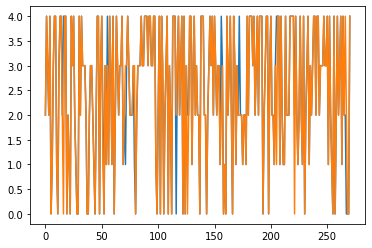

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 7, random_state = 1)
# Train the model on training data
rf.fit(X_train, y_train);
ry_pred =rf.predict(X_test)
classifiers.append(rf)
print("Accuracy score: %.2f"% accuracy_score(y_test, ry_pred))
accuracy.append(accuracy_score(y_test, ry_pred))
print("Confusion matrix\n",confusion_matrix(y_test, ry_pred))
print(classification_report(y_test, ry_pred))
f1.append(f1_score(y_test, ry_pred,average='weighted'))
recall.append(recall_score(y_test, ry_pred,average='weighted'))
precision.append(precision_score(y_test, ry_pred,average='weighted'))
#plotting y_pred and y_test
t = np.arange(0,len(ry_pred) , 1)
plt.plot(t,ry_pred,t,y_test)

##**Support vector Machine**

Accuracy: 0.8929889298892989
Confusion matrix
 [[29  0  5  0  1]
 [ 0 11  3  4 10]
 [ 0  0 62  0  0]
 [ 0  6  0 54  0]
 [ 0  0  0  0 86]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        35
           1       0.65      0.39      0.49        28
           2       0.89      1.00      0.94        62
           3       0.93      0.90      0.92        60
           4       0.89      1.00      0.94        86

    accuracy                           0.89       271
   macro avg       0.87      0.82      0.84       271
weighted avg       0.89      0.89      0.88       271



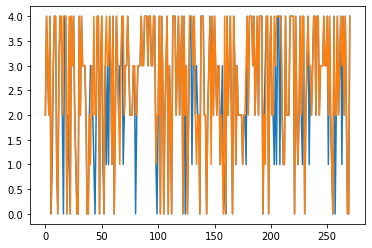

In [ ]:
#Import svm model
from sklearn import svm
from sklearn import metrics 
#Create a svm Classifier
sclf = svm.SVC(kernel='rbf') # Linear Kernel
#Train the model using the training sets
sclf.fit(X_train, y_train)
#Predict the response for test dataset
sy_pred = sclf.predict(X_test)
classifiers.append(sclf)
print("Accuracy:",accuracy_score(y_test, sy_pred))
accuracy.append(accuracy_score(y_test, sy_pred))
print("Confusion matrix\n",confusion_matrix(y_test, sy_pred))
print(classification_report(y_test, sy_pred))
f1.append(f1_score(y_test, sy_pred,average='weighted'))
recall.append(recall_score(y_test, sy_pred,average='weighted'))
precision.append(precision_score(y_test, sy_pred,average='weighted'))
t = np.arange(0,len(sy_pred) , 1)
plt.plot(t,y_test, sy_pred)

##**K nearest Neighbour**

Accuracy : 0.84
Confusion matrix
 [[29  0  5  0  1]
 [ 0 24  0  4  0]
 [ 2  0 55  0  5]
 [ 0  6  0 43 11]
 [ 0  3  5  1 77]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        35
           1       0.73      0.86      0.79        28
           2       0.85      0.89      0.87        62
           3       0.90      0.72      0.80        60
           4       0.82      0.90      0.86        86

    accuracy                           0.84       271
   macro avg       0.84      0.84      0.84       271
weighted avg       0.85      0.84      0.84       271



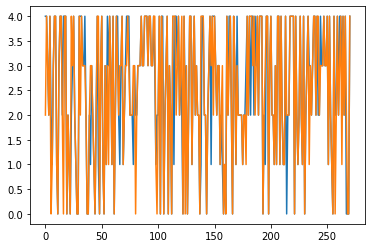

In [ ]:
from sklearn import neighbors
#knearest neighbhors
n_neighbors=25
knn=neighbors.KNeighborsClassifier(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
ky_pred=knn.predict(X_test)
classifiers.append(knn)
print("Accuracy : %.2f"% accuracy_score(y_test, ky_pred))
accuracy.append(accuracy_score(y_test, ky_pred))
print("Confusion matrix\n",confusion_matrix(y_test, ky_pred))
print(classification_report(y_test, ky_pred))
f1.append(f1_score(y_test, ky_pred,average='weighted'))
recall.append(recall_score(y_test, ky_pred,average='weighted'))
precision.append(precision_score(y_test, ky_pred,average='weighted'))
#plotting ky_pred and y_test
t = np.arange(0,len(ky_pred) , 1)
plt.plot(t,ky_pred,t,y_test)

##**Decision Tree**

In [ ]:
feature_cols = X_train.columns.tolist()

Accuracy : 0.96
Confusion matrix
 [[34  0  0  0  1]
 [ 0 21  1  4  2]
 [ 1  0 61  0  0]
 [ 0  0  0 60  0]
 [ 0  1  0  0 85]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.95      0.75      0.84        28
           2       0.98      0.98      0.98        62
           3       0.94      1.00      0.97        60
           4       0.97      0.99      0.98        86

    accuracy                           0.96       271
   macro avg       0.96      0.94      0.95       271
weighted avg       0.96      0.96      0.96       271



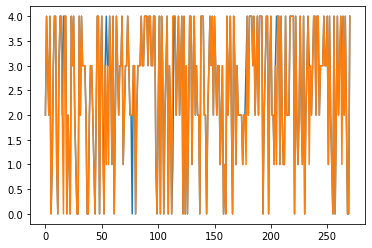

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
dclf = DecisionTreeClassifier(max_depth = 5,random_state=1,criterion='entropy')
# Train Decision Tree Classifer
dclf = dclf.fit(X_train,y_train)
#Predict the response for test dataset
dy_pred = dclf.predict(X_test)
classifiers.append(dclf)
print("Accuracy : %.2f"% accuracy_score(y_test, dy_pred))
accuracy.append(accuracy_score(y_test, dy_pred))
print("Confusion matrix\n",confusion_matrix(y_test, dy_pred))
print(classification_report(y_test, dy_pred))
f1.append(f1_score(y_test, dy_pred,average='weighted'))
recall.append(recall_score(y_test, dy_pred,average='weighted'))
precision.append(precision_score(y_test, dy_pred,average='weighted'))
#plotting y_pred and y_test
t = np.arange(0,len(dy_pred) , 1)
plt.plot(t,dy_pred,t,y_test)

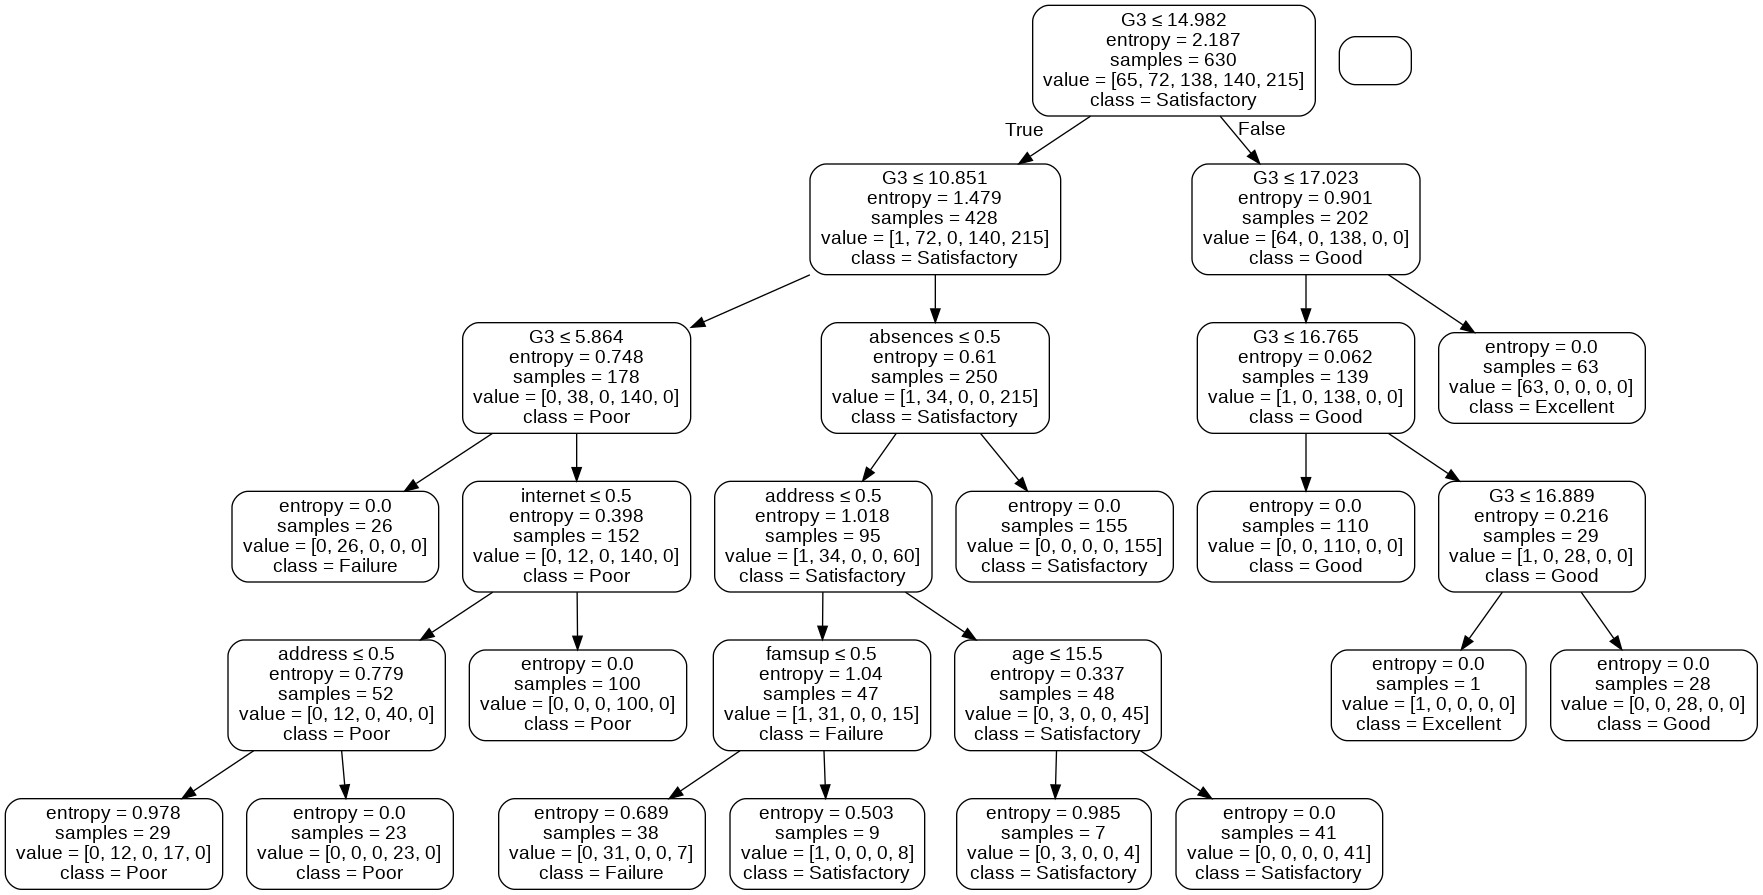

In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
dot_data = StringIO()
export_graphviz(dclf, out_file=dot_data, rounded=True,special_characters=True,feature_names = feature_cols,class_names=['Excellent','Failure','Good','Poor','Satisfactory'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('students.png')
Image(graph.create_png())

##**Logistic Regression**

Accuracy: 0.81
Confusion matrix
 [[30  0  4  0  1]
 [ 2 17  2  4  3]
 [ 1  0 57  0  4]
 [ 0 10  0 43  7]
 [ 0  4  5  4 73]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.55      0.61      0.58        28
           2       0.84      0.92      0.88        62
           3       0.84      0.72      0.77        60
           4       0.83      0.85      0.84        86

    accuracy                           0.81       271
   macro avg       0.79      0.79      0.79       271
weighted avg       0.82      0.81      0.81       271



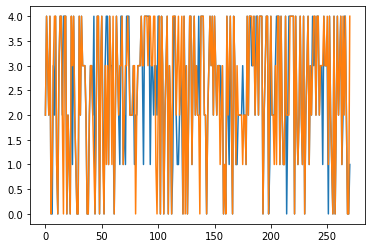

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
loy_pred = model.predict(X_test)
classifiers.append(model)
print("Accuracy: %.2f"% accuracy_score(y_test, loy_pred))
accuracy.append(accuracy_score(y_test, loy_pred))
print("Confusion matrix\n",confusion_matrix(y_test, loy_pred))
print(classification_report(y_test, loy_pred))
f1.append(f1_score(y_test, loy_pred,average='weighted'))
recall.append(recall_score(y_test, loy_pred,average='weighted'))
precision.append(precision_score(y_test, loy_pred,average='weighted'))
#plotting y_pred and y_test
t = np.arange(0,len(loy_pred) , 1)
plt.plot(t,loy_pred,t,y_test)

#**EVALUATION METRIC**

In [ ]:
X=('Random forest','Support vector machine','K Nearest Neighbour','Decision tree','logistic Regression')

##**Metric Comparisson**

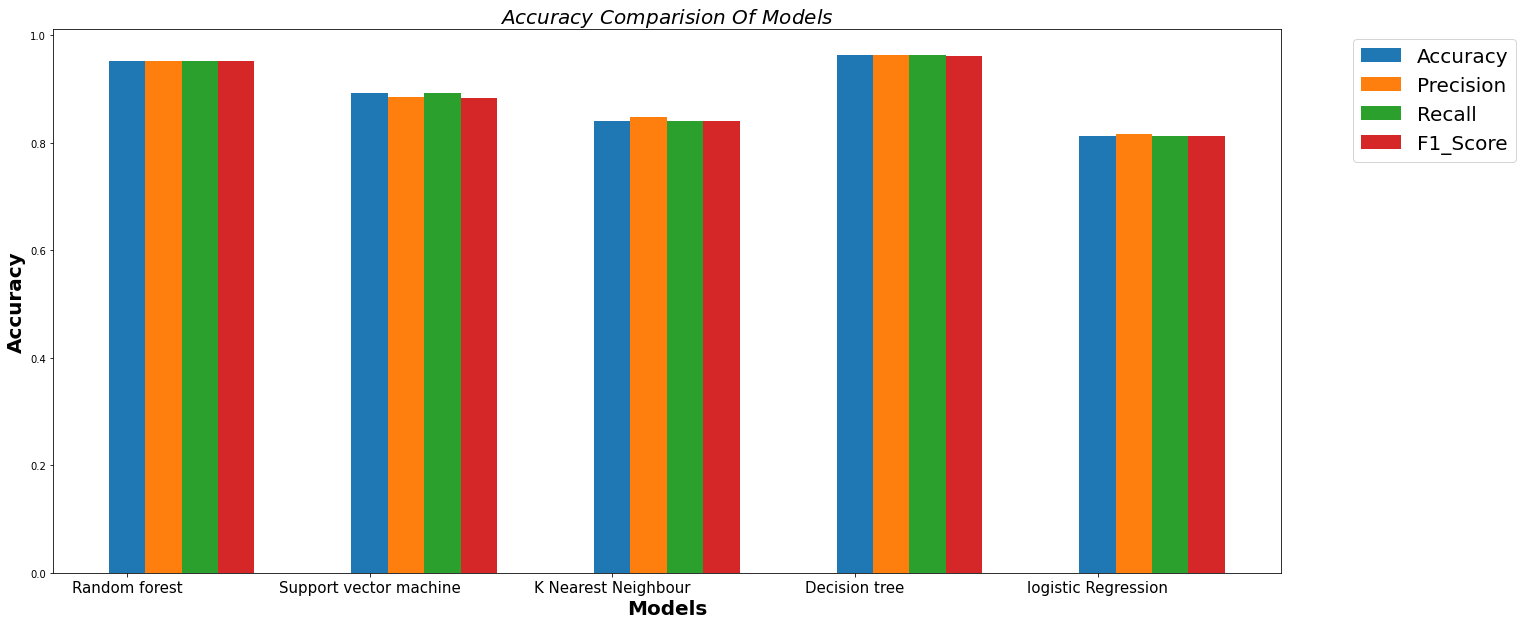

In [ ]:
plt.figure(figsize=(22,10)) 

X_axis = np.arange(len(X))
barWidth = 0.15
# Set position of bar on X axis
pos1 = np.arange(len(X))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]
  
plt.bar(pos1,accuracy,width=barWidth, label = 'Accuracy')
plt.bar(pos2,precision,width=barWidth, label = 'Precision')
plt.bar(pos3,recall,width=barWidth, label = 'Recall')
plt.bar(pos4,f1,width=barWidth, label = 'F1_Score')
  
plt.xticks(X_axis, X,fontsize=15)
plt.xlabel("Models",fontweight='bold',fontsize=20)
plt.ylabel("Accuracy",fontweight='bold',fontsize=20)

plt.title("$Accuracy$ $Comparision$ $Of$ $Models$",fontsize=20,fontweight='bold')
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1.0),fontsize=20)
plt.show()

##**K fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv = KFold(n_splits=10, random_state=1, shuffle=True)
cv_results = []
for i in classifiers :
    cv_results.append(cross_val_score(i, X_train,y_train, cv=cv,n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())


cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["RandomForest","SVC","KNeighboors","DecisionTree","LogisticRegression"]})

print(cv_res)


   CrossValMeans  CrossValerrors           Algorithm
0       0.946032        0.017675        RandomForest
1       0.880952        0.037730                 SVC
2       0.858730        0.027902         KNeighboors
3       0.947619        0.021355        DecisionTree
4       0.769841        0.055556  LogisticRegression


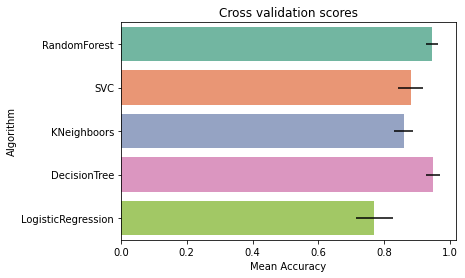

In [ ]:
sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, palette="Set2", orient="h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores");

#**CONCLUSION**

In [ ]:
print("Models : ",X)
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("f1 score: ",f1)

Models :  ('Random forest', 'Support vector machine', 'K Nearest Neighbour', 'Decision tree', 'logistic Regression')
Accuracy :  [0.9520295202952029, 0.8929889298892989, 0.8413284132841329, 0.9630996309963099, 0.8118081180811808]
Precision :  [0.9526324675011456, 0.8861307174134275, 0.8478373388180226, 0.9632673599463268, 0.8157666167829524]
Recall :  [0.9520295202952029, 0.8929889298892989, 0.8413284132841329, 0.9630996309963099, 0.8118081180811808]
f1 score:  [0.9520054922349164, 0.8833797729206547, 0.8407627512913359, 0.9616513086154221, 0.8119357304703416]


##**OBSERVATION**


***KNN***
*   Needs to determine the value of K and the computation cost is high as it needs to compute the distance of each instance to all the training samples.

***Decision Tree***
*   is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data. 
*   Feature selection happens automatically: unimportant features will not influence the result.
*   The presence of features that depend on each other (multicollinearity) also doesn't affect the quality.


***Random forest***
*   requires requires much computational power as well as resources as it builds numerous trees to combine their outputs.
*   It also requires much time for training as it combines a lot of decision trees to determine the class.Due to the ensemble of decision trees.
*  It also suffers interpretability and fails to determine the significance of each variable.


***SVM***
*  algorithm is not suitable for large data sets.
*  As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification
*  Choosing a “good” kernel function is not easy


***Logistic Regression***
*   Logistic regression tends to underperform when there are multiple or non-linear decision boundaries.








**According to our dataset the Decision Tree is the best classification model with highest accuracy value of 96%, along with high values of 0.963 for precision, 0.96309 for recall ,0.9616 for F1 score,the highest cross validation score of 0.947619 and the lowest cross validation error of 021355**